<a href="https://colab.research.google.com/github/zizamra/EDA/blob/main/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Baca file (ubah namanya jika berbeda)
df = pd.read_csv('porto2.csv')

# Tampilkan beberapa baris awal
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
# Siapkan X dan y
X = df[['Annual Income']]
y = df['Price ($)']

# Buat model
model = LinearRegression()
model.fit(X, y)

# Prediksi
y_pred = model.predict(X)

# Evaluasi
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2:.4f}')
print(f'Intercept: {model.intercept_:.2f}')
print(f'Slope (coefficient): {model.coef_[0]:.2f}')

#hubungan data tidak dapat dijelaskan dengan nilai Rsquare = 0.0001

R² Score: 0.0001
Intercept: 27884.36
Slope (coefficient): 0.00


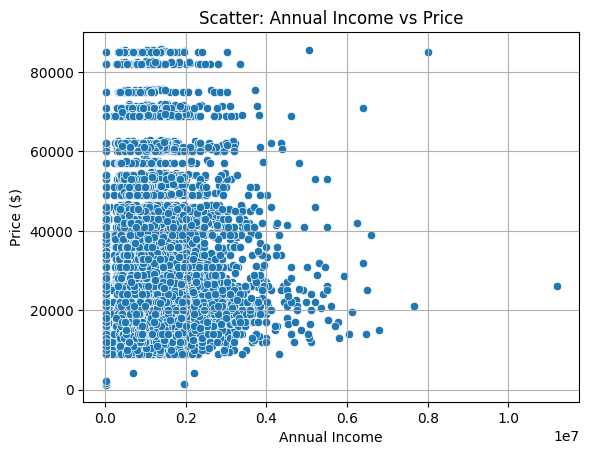

In [6]:
sns.scatterplot(x='Annual Income', y='Price ($)', data=df)
plt.title("Scatter: Annual Income vs Price")
plt.grid(True)
plt.show()


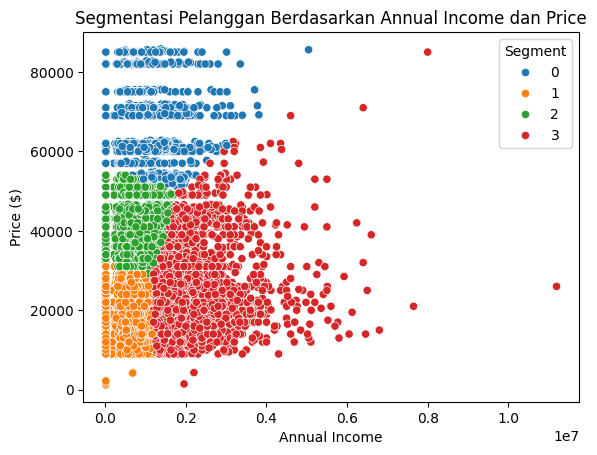

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur
features = df[['Annual Income', 'Price ($)']].copy()

# Standarisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

# Visualisasi hasil klaster
import seaborn as sns
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Segment', palette='tab10')
plt.title('Segmentasi Pelanggan Berdasarkan Annual Income dan Price')
plt.show()


In [8]:
# One-hot encoding wilayah
df_encoded = pd.get_dummies(df[['Annual Income', 'Price ($)', 'Dealer_Region']], drop_first=True)

# Standarisasi semua fitur
scaled = StandardScaler().fit_transform(df_encoded)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=7)
df['Segment'] = kmeans.fit_predict(scaled)


In [9]:
pd.crosstab(df['Dealer_Region'], df['Segment'])


Segment,0,1,2,3
Dealer_Region,,,,
Aurora,0,0,3130,0
Austin,0,0,4135,0
Greenville,3128,0,0,0
Janesville,0,0,0,3821
Middletown,0,0,3128,0
Pasco,0,3131,0,0
Scottsdale,0,0,3433,0


In [10]:
df.groupby(['Segment', 'Dealer_Region'])[['Annual Income', 'Price ($)']].agg(['min', 'max', 'count'])


Annual Income                 Price ($)             
                                min       max count       min    max count
Segment Dealer_Region                                                     
0       Greenville            13500   6800000  3128      1200  85200  3128
1       Pasco                 10080   6460000  3131      9000  85600  3131
2       Aurora                13500   7650000  3130      9000  85800  3130
        Austin                13500  11200000  4135      9000  85601  4135
        Middletown            13500   6400000  3128      1700  85300  3128
        Scottsdale            13500   6240000  3433      1450  85001  3433
3       Janesville            13500   5500000  3821      4300  85400  3821

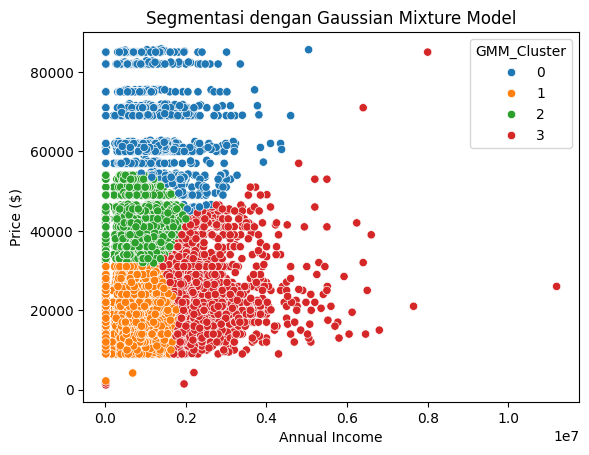

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan df sudah berisi data
features = df[['Annual Income', 'Price ($)']]

# Standardisasi data
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

gmm = GaussianMixture(n_components=4, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(scaled)

sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='GMM_Cluster', palette='tab10')
plt.title('Segmentasi dengan Gaussian Mixture Model')
plt.show()


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Ambil fitur
features = df[['Annual Income', 'Price ($)']]

# Standarisasi
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled)

# Evaluasi
kmeans_silhouette = silhouette_score(scaled, kmeans_labels)


# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled)

# Evaluasi
gmm_silhouette = silhouette_score(scaled, gmm_labels)

print(f"Silhouette Score KMeans: {kmeans_silhouette:.4f}")
print(f"Silhouette Score GMM: {gmm_silhouette:.4f}")

#nilai yang lebih dekat dengan 1 memiliki hasil yang lebih baik

Silhouette Score KMeans: 0.4018
Silhouette Score GMM: 0.3923
